In [4]:

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers


classifier = Sequential()


classifier.add(Convolution2D(32, 3,  3, input_shape = (64, 64, 3), activation = 'relu'))


classifier.add(MaxPooling2D(pool_size =(2,2)))


classifier.add(Flatten())


classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(6, activation = 'softmax'))


classifier.compile(
              optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

model = classifier.fit_generator(
        training_set,
        steps_per_epoch=89,
        epochs=20,
        validation_data = test_set,
        validation_steps = 27
      )











Found 5394 images belonging to 6 classes.
Found 1686 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
89/89 [==============================] - 338s 4s/step - loss: 1.2408 - accuracy: 0.5558 - val_loss: 0.6289 - val_accuracy: 0.8079
Epoch 2/20
89/89 [==============================] - 167s 2s/step - loss: 0.6513 - accuracy: 0.7676 - val_loss: 0.4024 - val_accuracy: 0.8877
Epoch 3/20
89/89 [==============================] - 85s 962ms/step - loss: 0.4928 - accuracy: 0.8331 - val_loss: 0.3068 - val_accuracy: 0.8935
Epoch 4/20
89/89 [==============================] - 53s 596ms/step - loss: 0.4090 - accuracy: 0.8648 - val_loss: 0.2655 - val_accuracy: 0.9167
Epoch 5/20
89/89 [==============================] - 35s 400ms/step - loss: 0.3614 - accuracy: 0.8690 - val_loss: 0.2186 - val_accuracy: 0.9201
Epoch 6/20
89/89 [==============================] - 29s 319ms/step - loss: 0.3343 - accuracy: 0.8860 - val_loss: 0.2381 - val_accuracy: 0.9190
Epoch 7/20
89/89 [==============================] - 22s 248ms/step - loss: 0.2854 - accuracy: 0.9072 - val_loss: 0.2003 - val_accuracy: 0.9410
Epo

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


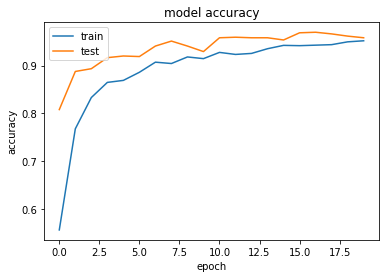

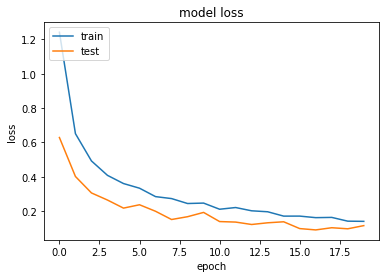

In [5]:

import h5py
classifier.save('Trained_Fruit_Model.h5')

print(model.history.keys())
import matplotlib.pyplot as plt


plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
